<a href="https://colab.research.google.com/github/Rohan5076/Natural-Language-Processing-NLP-/blob/main/BERTopic%E2%80%94Advanced_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advanced Topic Modeling with BERTopic**

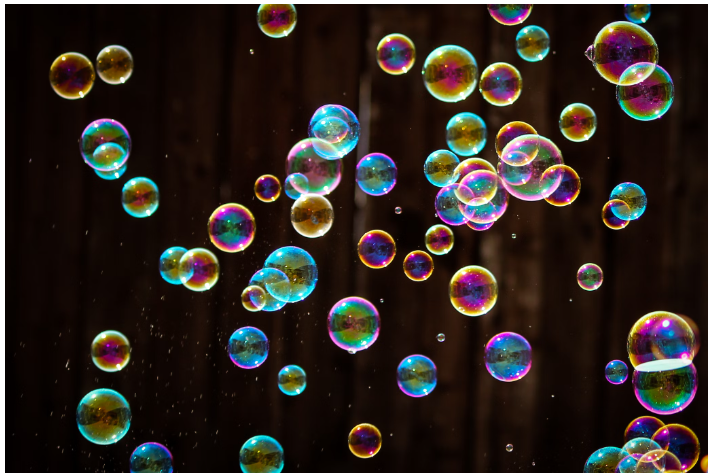

# **Data**

This is the Australian Broadcasting Corporation news published over a period of eight years, freely available on Kaggle. It has two main columns: publish_date: date of publishing for the article in yyyyMMdd format. headline_text: text of the headline in English. This is the information that will be used by the topic model.

In [15]:
import pandas as pd 
# Github URL
data_url = "https://raw.githubusercontent.com/keitazoumana/BERTopic-Topic-Modeling/main/abcnews_sample.csv"

# Read the dataset from the URL
data = pd.read_csv(data_url)

In [16]:
data.head()

,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business


In [17]:
# Create a new column containing the length each headline text
data["headline_text_len"] = data["headline_text"].apply(lambda x : len(x.split()))


In [18]:
print("The longest headline has: {} words".format(data.headline_text_len.max()))


The longest headline has: 13 words


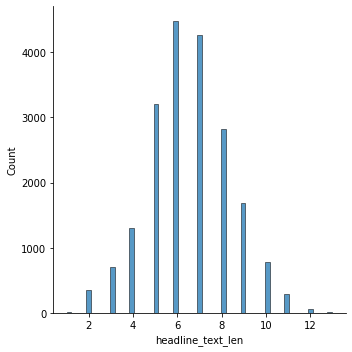

In [19]:
# Visualize the length distribution 
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.headline_text_len, kde=False)

In [20]:
for idx in data.sample(3).index:
    headline = data.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication date: {}".format(headline.publish_date))
    print("Text: {}\n".format(headline.headline_text))

Headline #4231:
Publication date: 20101116
Text: 43 billion dollar question

Headline #3929:
Publication date: 20140617
Text: majak daw reportedly under investigation for sexual assault

Headline #16053:
Publication date: 20130319
Text: carr condemns frenzy of leadership speculation



# **Topic Modeling**

In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.

Topic Modeling
In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.

## **Training**

We start by instantiating BERTopic. We set language to english since our documents are in the English language. If you would like to use a multi-lingual model, please use language="multilingual" instead.

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.

In [21]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data.headline_text)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2022-09-14 20:26:12,828 - BERTopic - Transformed documents to Embeddings
2022-09-14 20:27:12,657 - BERTopic - Reduced dimensionality
2022-09-14 20:27:16,476 - BERTopic - Clustered reduced embeddings


CPU times: user 2min 57s, sys: 4.29 s, total: 3min 1s
Wall time: 2min 57s


* Verbose to True: so that the model initiation process does not show messages.
* paraphrase-MiniLM-L3-v2 is the sentence transformers model with the great trade-off of performance and speed.
* min_topic_size set to 7 and the default value is 10. The higher the value, the lower is the number of cluster/topics
.fit_transform() trains the BERTopic model on the headline dataset Also we can see that there are 54 topics overall, but they might not be all relevant. However, we might want to look at those that best represent the collection of headlines using the .get_topic_info() function below.

## **Topic Extraction and Representation.**

In [23]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 435


,Topic,Count,Name
0,-1,8228,-1_police_in_to_for
1,0,394,0_fire_bushfire_firefighters_fires
2,1,207,1_interview_extended_brett_nathan
3,2,159,2_doctor_doctors_hospital_health
4,3,156,3_coronavirus_covid_restrictions_cases


The above table has 3 main columns, providing information about all the 54 topics in descending order of topics size/Count.

* **'Topic'** is the topic number, a kind of identifier, and the outliers are labeled as -1. Those are topics that should be ignored because they do not bring any added value.
* **'Count'** is the number of words in the topic.
* **Name** is the name given to the topic.

For each topic, we can retrieve the top words and their corresponding c-TF-IDF score. The higher the score, the most relevant the word is in representing the topic.

In [24]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('fire', 0.05125248185409123),
 ('bushfire', 0.04042548738115144),
 ('firefighters', 0.0266750301004726),
 ('fires', 0.02324316654068541),
 ('bushfires', 0.02105606403802954),
 ('crews', 0.017105466170674696),
 ('arson', 0.015867595814598862),
 ('burning', 0.014141623444726865),
 ('homes', 0.013842548229268278),
 ('blaze', 0.013833815543885679)]

From this topic, we observe that all the words are coherent for the underlying topic which seems to be about firefighters 🔥.

# **Topics Visualization.**

The topic visualization helps in gaining more insight about each topic. BERTopic provides several visualization possibilities such as terms visualization, intertopic distance map, topic hierarchy clustering just to name a few, and our focus will be on those that have been cited.

# **Topic Terms**

The most relevant words of each topic can be visualized in a form of barchart out of the c-TF-IDF score, which is interesting to visually compare topics. Below is the corresponding visualization for the topic 6 topics.

In [25]:
model.visualize_barchart(top_n_topics=6)

The top words for topic 1 are man, charged murder jail over, which is obviously a crime related topic. The same analysis can be easily derived from each of the remaining topics. The longer the horizontal bar, the most relevant it is to the topic.

# **Intertopic Distance Map.**

For those who are fimiliar with Latent Dirichlet Allocation LDAvis library. This library provides the user with an interactive dashboard showing for each topic the corresponding words and their score. BERTopic does the same with its visualize_topics() function and even go one step further by giving the distance between topics (the lower the most similar), and all of this with a single function visualize_topics()

In [26]:
model.visualize_topics()

# **Visualize Topic Hierarchy**

As you can see in the Interdistance topic dashboard, some topics are very close. One thing that could come to mind is how can I reduce the number of topics? The good new is that those topics can be hierarchically in order to select the appropriate number of topics. The visualization flavor helps to understand how they relate to one another.

In [27]:
model.visualize_hierarchy(top_n_topics=30)

By looking at the first level (level 0) of the dendogram, we can see that topics with the same colors have been grouped together. For instance

* Topic 7 (health, hospital, mental) & 14 (dies, crash, killed) have been grouped together because of their closeness.
* Topic 6 (farmers, farm, farmer) & 16 (cattle, sheep, beef) also have be grouped the same way. etc.
* All these information can help the user better understand the reason why the topics have been considered to be similar one to another.

# **Search Topics.**


Once the topic model is trained, we can search for topics that are semantically similar to an input query word/term using the find_topics function. In our case, we can search for top 3 topics that are related to the word 'politics'


In [28]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)


* similar_topics contains the topics index from most similar to least similar.
* similarity contains the similarity scores in descending order.

In [29]:
similar_topics

[154, 31, 186]

In [30]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('republican', 0.12097441113949033), ('clinton', 0.11228304979882374), ('presidential', 0.09948544417289178), ('hillary', 0.07892874794375518), ('biden', 0.0700796838513951), ('trump', 0.06634297362119468), ('romney', 0.050323951694591876), ('mccain', 0.050323951694591876), ('debate', 0.04931400742251542), ('obama', 0.043322969778673656)]
Similarity Score: 0.6059631522395497


We can see that the most similar topic is showing terms 'election', 'trump', 'obama', etc. which are obviously related to politics.

# **Model Serialization & Loading**


When you are satisfied with your model's result, you can save if for further analysis using the following instructions:

In [31]:
%%bash
mkdir './model_dir'

In [32]:
# Save the model in the previously created folder with the name 'my_best_model'
model.save("./model_dir/my_best_model")

# Load the serialized model
my_best_model = BERTopic.load("./model_dir/my_best_model")
my_best_model

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



# **Conclusion**

Now, you know how to use BERTopic for topic modeling. The results are very encouraging, and do not hesitate to give it a try on your business case. However, it is important to note that the results of BERTopic are not consistent between runs, this is due to the stochastic nature of UMAP used for dimensionality reduction. So, using the random_state parameter in UMAP the any stochastic behavior.

